<a href="https://colab.research.google.com/github/matheusomendonca/pos-ia-ds/blob/master/Classes/Data%20visualization/%5BProfessor%5D_Data_visualization_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização dos dados disponibilizados pelo Imperial College sobre a pesquisa do impacto do covid-19 em diferentes cenários de mitigação de risco

O primeiro passo é importar as bibliotecas de visualização necessárias. Iremos trabalhar com umas bibliotecas básicas:

- [matplotlib](https://matplotlib.org/): biblioteca básica de visualização em Python;
- [seaborn](https://seaborn.pydata.org/): biblioteca de visualização estatística escrita baseada no matplotlib.

E outras um pouco mais sofisticadas...
- [missingno](https://github.com/ResidentMario/missingno): biblioteca usada para visualização de dados faltantes;
- [plotly](https://plotly.com/): biblioteca para visualização interativa.

In [1]:
# bibliotecas básicas
import pandas as pd
import numpy as np

# bibliotecas de visualização
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno #! pip install missingno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


A seguir, iremos realizar definir o tamanho padrão das imagens ao longo deste notebook.

In [0]:
# configuração do plot
figsize = (10, 7)
matplotlib.rcParams['figure.figsize'] = figsize

## Leitura dos dados

Iremos realizar a visualização dos dados disponibilizados pelo Imperial College no dia 26/03/2020 sobre a [pesquisa](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020.pdf) que simula o impacto global de diferentes estratégias de mitigação do avanço do corona vírus.

A [base de dados](https://pycourse.s3.amazonaws.com/ImperialCollege-COVID19-scenarios.xlsx) é um arquivo excel com 4 worksheets:

1. Countries: dados básicos do [World Bank](https://www.worldbank.org/);
2. Mitigation: impactos do covid-19 para diferentes níveis de isolamento social;
3. Suppression: impactos do covid-19 para medidas de isolamento tomadas somente após um gatilho;
4. Dictionary: dicionário descritivo das variáveis.

O worksheet 4 é muito importante para o completo entendimento dos dados. A seguir está replicado o conteúdo deste worksheet.

**Mitigation Sheet**	
	
- **Country**:	Name of country or region
- **R0**:	Basic Reproduction number (average number of secondary infection by a typical infection in an unconstrained epidemic and wholly susceptible population)
- **Strategy**:
	- "Unmitigated" = no intervention; 
	- "Social distancing whole population" = optimal outcome when epidemic is mitigated interventions to limit contacts in the general population including social distancing; 
	- "Enhanced social distance of elderly"= optimal outcome when epidemic is mitigated through interventions to limit contacts in the general population including social distancing, alongside enhanced social distancing of over 70s (modelled as a 60% reduction in contact rate); 
- **Social_distance**:	Percentage reduction in contacts in the general population
	- For "Unmitigated" this is 0
	- For "Social distancing whole population" this reduction applies to the whole population
	- For "Enhanced social distancing of elderly" this applies to just individuals under 70. For individuals 70 and above we assume a 60% reduction.
- **total_pop**: Total population according to 2020 World Population Prospects (https://population.un.org/wpp/)
- **total_infected**: Final total population infected by the end of the pandemic
- total_death: Final total deaths by the end of the pandemic (assuming China-like age-severity profile and health system)
- **total_hospital**: Final total individuals requiring hospitalisation by the end of the pandemic (assuming China-like age-severity profile)
- **total_critical**: Final total individuals requiring critical care by the end of the pandemic (assuming China-like age-severity profile)

**Suppression Sheet**	
- **Country**:	Name of country or region
- **R0**:	Basic Reproduction number (average number of secondary infection by a typical infection in an unconstrained epidemic and - wholly susceptible population)
- **Strategy**
	- "Unmitigated" = no intervention
	- "0.2 deaths per million per week trigger" = suppression triggered when weekly death rate reaches this threshold
	- "1.6 deaths per million per week trigger" = suppression triggered when weekly death rate reaches this threshold
- **Social_distance**:	Proportional reduction in contact rate in general population modelled
- **total_pop**:	Total population according to 2020 World Population Prospects (https://population.un.org/wpp/)
- **total_infected**:	Final total population infected by the end of the pandemic. 
- **total_death**:	Final total deaths by the end of the pandemic (assuming China-like age-severity profile and health system). 
- **total_hospital**:	Final total individuals requiring hospitalisation by the end of the pandemic (assuming China-like age-severity profile)
- **peak_hospital_bed_demand**:	Number of hospital beds occupied at the peak of the epidemic (i.e. maximum demand/occupancy during the epidemic)
- **total_critical**:	Final total individuals requiring critical care by the end of the pandemic (assuming China-like age-severity profile)
- **peak_critical_bed_demand**:	Number of critical care beds occupied at the peak of the epidemic (i.e. maximum demand/occupancy during the epidemic)

Enfim, vamos realizar a leitura dos dados:

In [0]:
# leitura dos dados
data = pd.ExcelFile("https://pycourse.s3.amazonaws.com/ImperialCollege-COVID19-scenarios.xlsx")

Como é um excel, precisamos ver as worksheets (abas) disponíveis...

In [4]:
# worksheets disponíveis
print(f"Worksheets disponíveis: {data.sheet_names}")

Worksheets disponíveis: ['Countries', 'Mitigation', 'Suppression', 'Dictionary']


No primeiro momento, iremos analisar indivualmente cada uma das 3 worksheets disponibilizadas.

## Worksheet: Countries

In [0]:
# trabalhando com a base Countries
countries_df = pd.read_excel(data, data.sheet_names[0], decimal=',')

In [6]:
# visualização das primeiras linhas
countries_df.head()

,"Region, subregion, country or area *",country_code,World Bank region,World Bank income grou,GDP 2018
0,Afghanistan,AFG,South Asia,Low income,1955.006208
1,Albania,ALB,Europe & Central Asia,Upper middle income,13364.155400
2,Algeria,DZA,Middle East & North Africa,Upper middle income,15481.787620
3,Angola,AGO,Sub-Saharan Africa,Lower middle income,6452.355165
4,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,26868.133520


A primeira coisa que iremos fazer é analisar os dados faltantes. Para isso, iremos utilizar a biblioteca `missingno`.

Essa análise inicial é muito importante pois nos permite identificar se existe padrões nos dados faltantes que possibilitam definir a melhor estratégia para tratamento desses dados.

O primeiro método que iremos utilizar do `missingno` é o `matrix`, pois ele nos permite visualizar a localização dos dados faltantes ao longo do nosso dataframe.

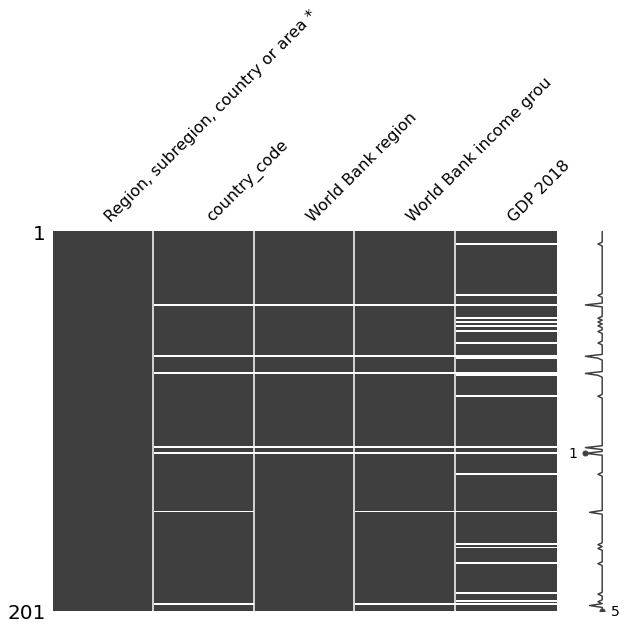

In [7]:
# visualização de dados faltantes
msno.matrix(countries_df, figsize=figsize)

O segundo método é o `bar`, ele nos mostra a quantidade de dados totais disponíveis para cada coluna do dataframe.

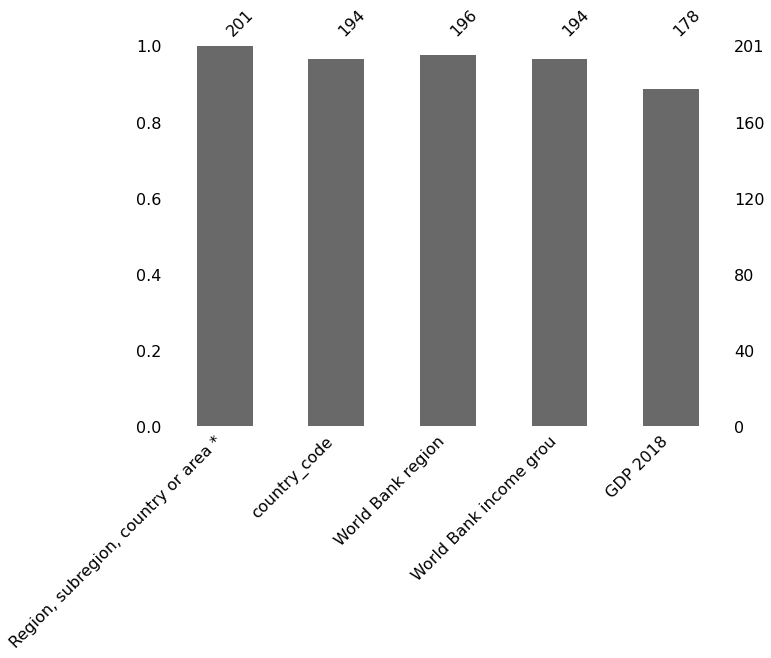

In [8]:
# visualização de dados faltantes
msno.bar(countries_df, figsize=figsize)

Agora como já temos uma ideia inicial da quantidade de dados faltantes e dos padrões, podemos utilizar o método `heatmap` que nos mostra a matriz de correlação entre as amostras faltantes.

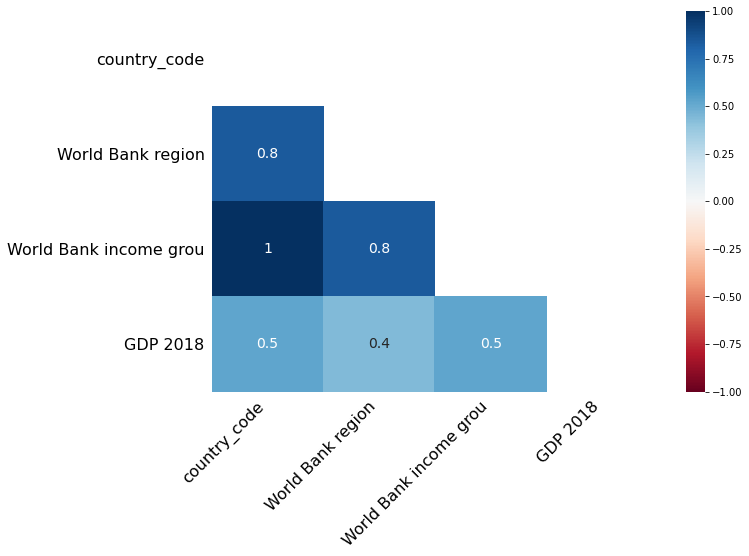

In [9]:
# visualização de dados faltantes
msno.heatmap(countries_df, figsize=figsize)

O matriz de correlação nos dá uma visualização entre pares de variáveis, se quisermos uma informação mais detalhada, podemos utilizar o dendrograma através do método `dendrogram`.

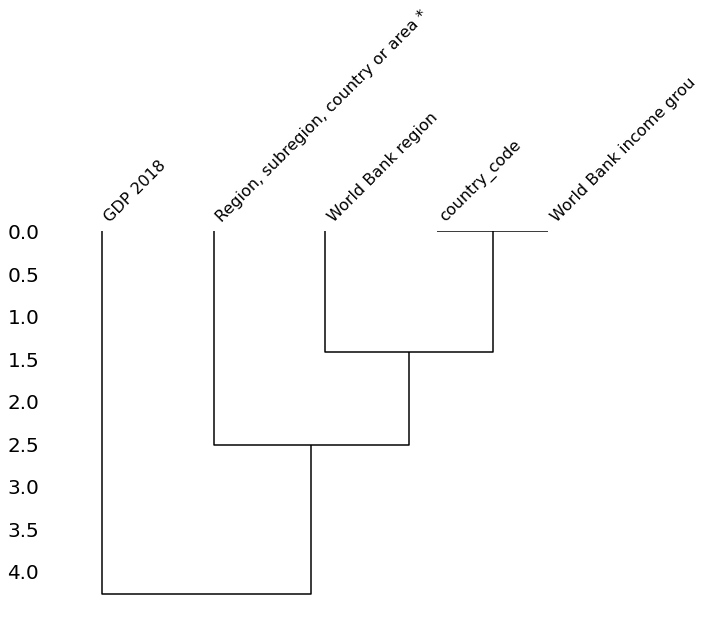

In [10]:
# visualização de dados faltantes
msno.dendrogram(countries_df, figsize=figsize)

Para fins de simplificação, iremos remover as amostras com dados faltantes.

In [0]:
# remoção das amostras com dados faltantes
countries_df.dropna(inplace=True)

In [12]:
# nomes das colunas
countries_df.columns.values

array(['Region, subregion, country or area *', 'country_code',
       'World Bank region', 'World Bank income grou', 'GDP 2018'],
      dtype=object)

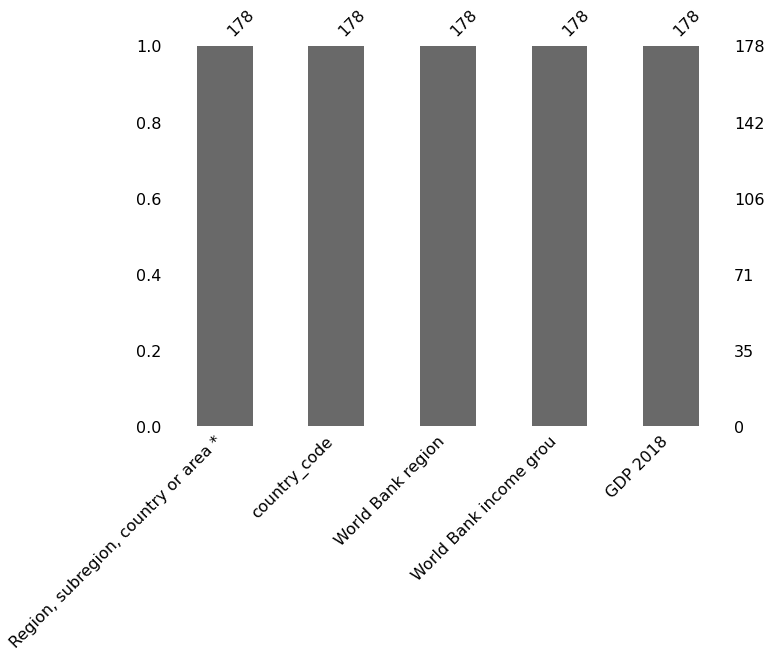

In [13]:
# validação da remoção de dados faltantes
msno.bar(countries_df, figsize=figsize)

## Análise das distribuições

O primeiro passo é tentar identificar o que é variável categórica e o que é variável numérica. Isso é importante pois nos ajuda a definir estratégias de agrupamento para visualização.

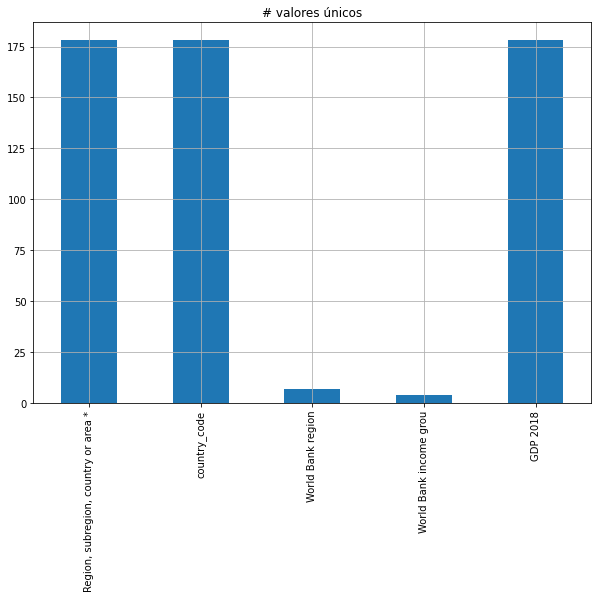

In [14]:
# número de valores únicos
countries_df.nunique().plot.bar(rot=90,
                                grid=True,
                                title='# valores únicos')

In [15]:
# valores únicos
print(f"Valores únicos da coluna {countries_df.columns[1]}:")
print(countries_df[countries_df.columns[2]].unique())

print(f"\nValores únicos da coluna {countries_df.columns[2]}:")
print(countries_df[countries_df.columns[3]].unique())

Valores únicos da coluna country_code:
['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']

Valores únicos da coluna World Bank region:
['Low income' 'Upper middle income' 'Lower middle income' 'High income']


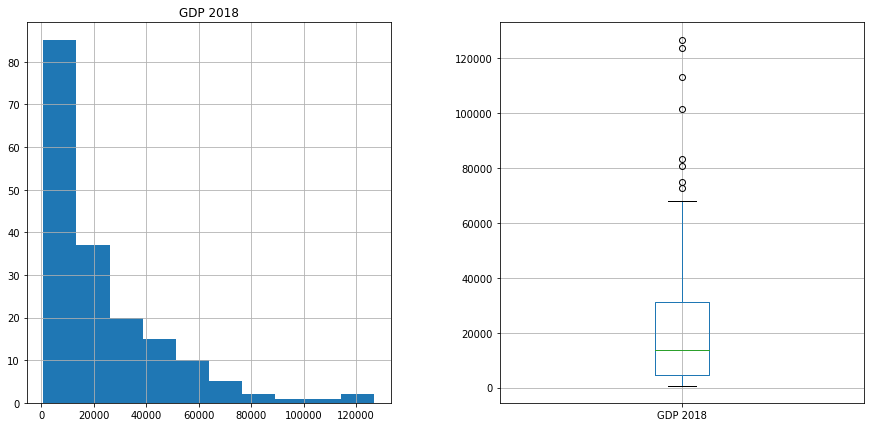

In [16]:
# visualização da distribuição do GDP
_, ax = plt.subplots(ncols=2, figsize=(15, 7))
countries_df.hist(column='GDP 2018', grid=True, ax=ax[0])
countries_df.boxplot(column='GDP 2018', ax=ax[1]);

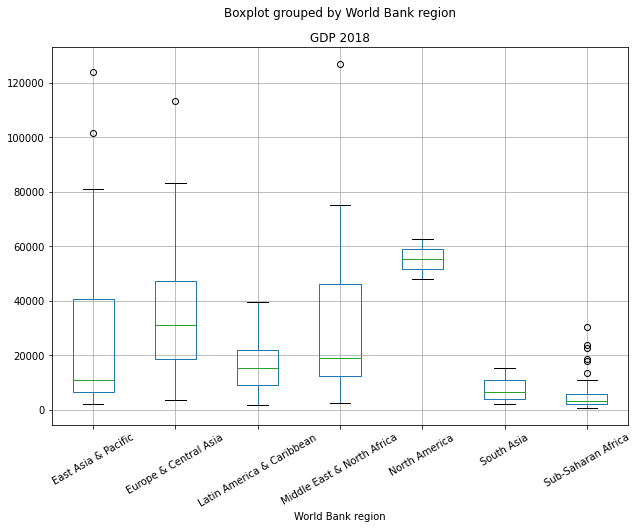

In [17]:
# separação por região mundial
countries_df.boxplot(column='GDP 2018', by=countries_df.columns[2], rot=30);

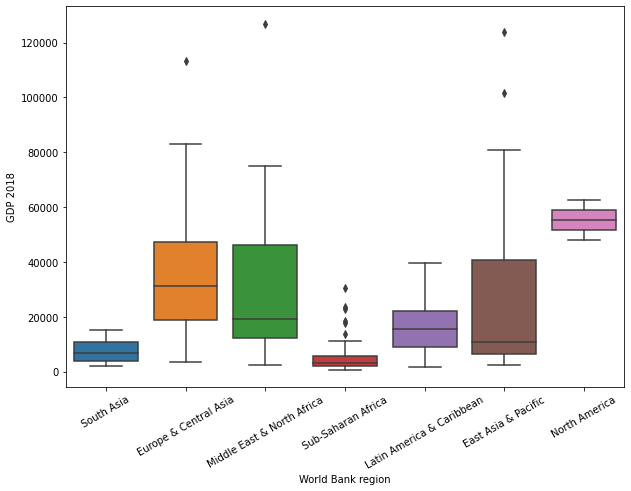

In [18]:
# visualização utilizando o seaborn
sns.boxplot(data=countries_df,
            y='GDP 2018',
            x='World Bank region')
plt.xticks(rotation=30);

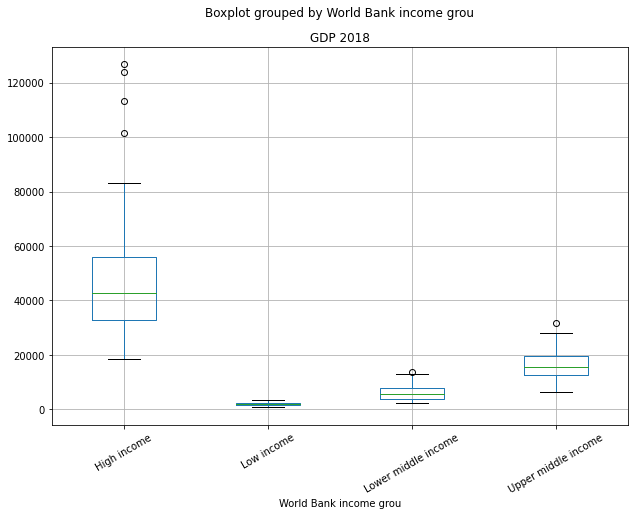

In [19]:
# separação por grupo financeiro
countries_df.boxplot(column='GDP 2018', by=countries_df.columns[3], rot=30);

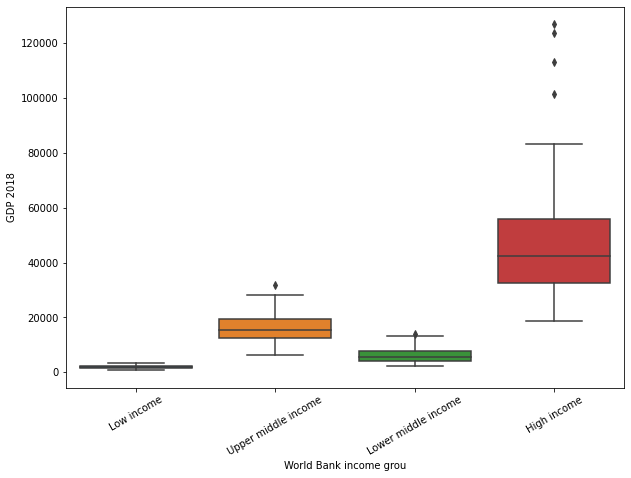

In [20]:
# visualização utilizando o seaborn
sns.boxplot(data=countries_df,
            y='GDP 2018',
            x=countries_df.columns[3])
plt.xticks(rotation=30)
plt.show()

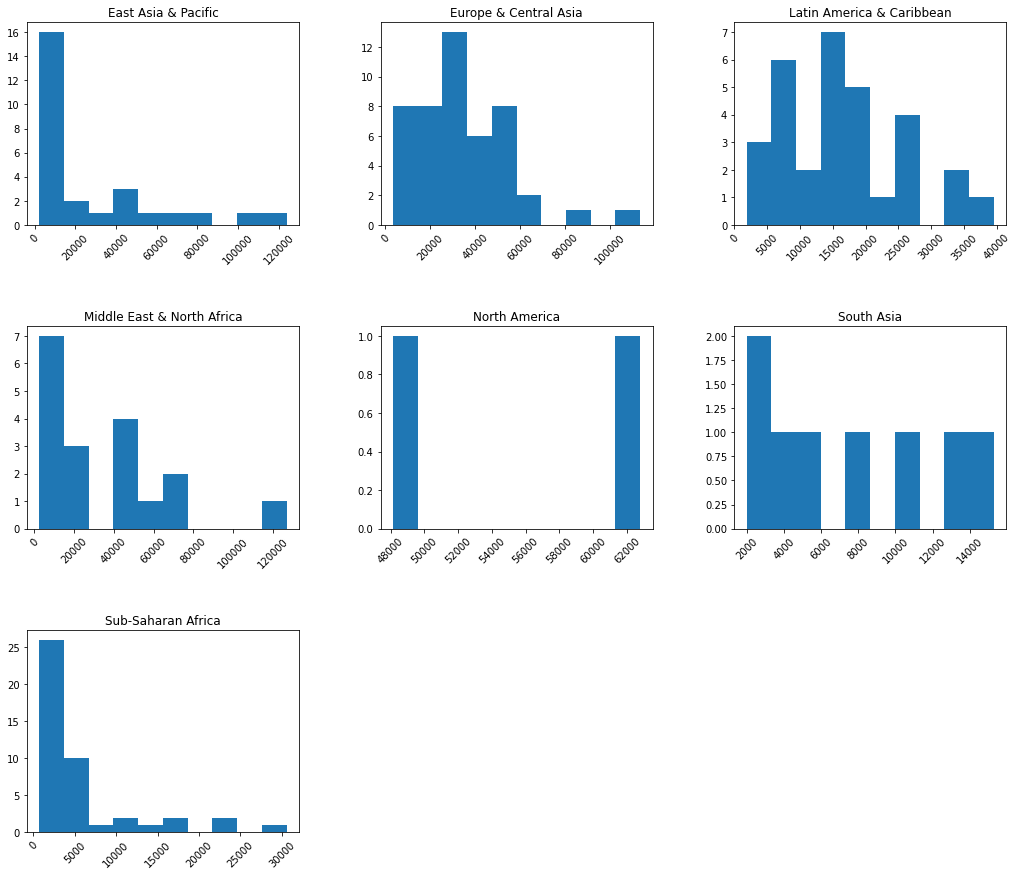

In [21]:
# visualização da distribuição do PIB por região
countries_df.hist(column='GDP 2018',
                  by=countries_df.columns[2],
                  figsize=(17, 15),
                  xrot=45)
plt.show()

# Worksheet: Mitigation
## Análise dos dados

In [0]:
# mitigation worksheet
mitigation_df = pd.read_excel(data, data.sheet_names[1])

In [23]:
# primeiras colunas
mitigation_df.head()

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical
0,Afghanistan,3.3,Unmitigated,0.0,38928341.0,36708969,77708,572873,103031
1,Albania,3.3,Unmitigated,0.0,2877800.0,2525855,20309,101349,26927
2,Algeria,3.3,Unmitigated,0.0,43851043.0,39550379,195348,1138076,258972
3,Angola,3.3,Unmitigated,0.0,32866268.0,30613383,57944,443936,76828
4,Antigua and Barbuda,3.3,Unmitigated,0.0,97928.0,85015,514,2843,681


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


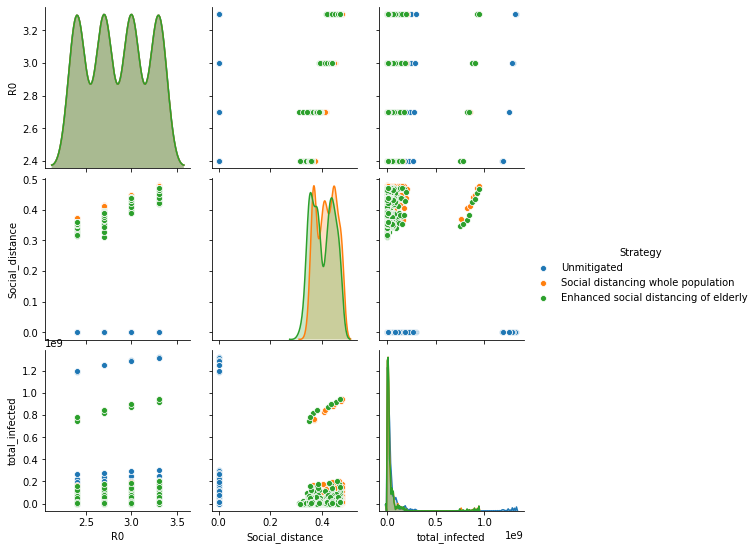

In [24]:
# pair plot
sns.pairplot(mitigation_df,
             hue='Strategy',
             vars=['R0', 'Social_distance', 'total_infected']);

In [25]:
# nomes das colunas disponíveis
print(mitigation_df.columns)

Index(['Country', 'R0', 'Strategy', 'Social_distance', 'total_pop',
       'total_infected', 'total_deaths', 'total_hospital', 'total_critical'],
      dtype='object')


In [26]:
# slice nos dados do Brasil
br_mitigation_df = mitigation_df.loc[mitigation_df['Country']=='Brazil', :]
br_mitigation_df

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical
23,Brazil,3.3,Unmitigated,0.000000,212559409.0,187799806,1152283,6206514,1527536
224,Brazil,3.3,Social distancing whole population,0.449681,212559409.0,122025818,627047,3496359,831381
425,Brazil,3.3,Enhanced social distancing of elderly,0.440651,212559409.0,120836850,529779,3222096,702497
626,Brazil,3.0,Unmitigated,0.000000,212559409.0,181084337,1088612,5891295,1443116
827,Brazil,3.0,Social distancing whole population,0.422029,212559409.0,114348169,576128,3222624,764105
1028,Brazil,3.0,Enhanced social distancing of elderly,0.412113,212559409.0,112988886,471742,2925842,625338
1229,Brazil,2.7,Unmitigated,0.000000,212559409.0,172162607,1008804,5490012,1337612
1430,Brazil,2.7,Social distancing whole population,0.390273,212559409.0,105309523,518315,2909776,687127
1631,Brazil,2.7,Enhanced social distancing of elderly,0.370706,212559409.0,102598007,322646,2348908,427709
1832,Brazil,2.4,Unmitigated,0.000000,212559409.0,160125948,908009,4974643,1204268


In [27]:
# criando novas features com os valores percentuas e em milhões
perc_names = list(br_mitigation_df.columns.values[5:9]+'_perc')
mil_names = list(br_mitigation_df.columns.values[5:9]+'_million')
br_mitigation_df[perc_names] = br_mitigation_df.loc[:,'total_infected':
                                                        'total_critical'].div(br_mitigation_df['total_pop'],
                                                                                              axis=0)*100
br_mitigation_df[mil_names] = br_mitigation_df.loc[:,'total_infected':
                                                       'total_critical']*1e-6

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
# visualizando as 5 primeias linhas do dataframe criado
br_mitigation_df

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical,total_infected_perc,total_deaths_perc,total_hospital_perc,total_critical_perc,total_infected_million,total_deaths_million,total_hospital_million,total_critical_million
23,Brazil,3.3,Unmitigated,0.000000,212559409.0,187799806,1152283,6206514,1527536,88.351679,0.542099,2.919896,0.718640,187.799806,1.152283,6.206514,1.527536
224,Brazil,3.3,Social distancing whole population,0.449681,212559409.0,122025818,627047,3496359,831381,57.407865,0.294998,1.644886,0.391129,122.025818,0.627047,3.496359,0.831381
425,Brazil,3.3,Enhanced social distancing of elderly,0.440651,212559409.0,120836850,529779,3222096,702497,56.848507,0.249238,1.515857,0.330494,120.836850,0.529779,3.222096,0.702497
626,Brazil,3.0,Unmitigated,0.000000,212559409.0,181084337,1088612,5891295,1443116,85.192341,0.512145,2.771599,0.678924,181.084337,1.088612,5.891295,1.443116
827,Brazil,3.0,Social distancing whole population,0.422029,212559409.0,114348169,576128,3222624,764105,53.795863,0.271043,1.516105,0.359478,114.348169,0.576128,3.222624,0.764105
1028,Brazil,3.0,Enhanced social distancing of elderly,0.412113,212559409.0,112988886,471742,2925842,625338,53.156379,0.221934,1.376482,0.294194,112.988886,0.471742,2.925842,0.625338
1229,Brazil,2.7,Unmitigated,0.000000,212559409.0,172162607,1008804,5490012,1337612,80.995053,0.474599,2.582813,0.629289,172.162607,1.008804,5.490012,1.337612
1430,Brazil,2.7,Social distancing whole population,0.390273,212559409.0,105309523,518315,2909776,687127,49.543572,0.243845,1.368924,0.323264,105.309523,0.518315,2.909776,0.687127
1631,Brazil,2.7,Enhanced social distancing of elderly,0.370706,212559409.0,102598007,322646,2348908,427709,48.267921,0.151791,1.105060,0.201219,102.598007,0.322646,2.348908,0.427709
1832,Brazil,2.4,Unmitigated,0.000000,212559409.0,160125948,908009,4974643,1204268,75.332327,0.427179,2.340354,0.566556,160.125948,0.908009,4.974643,1.204268


In [29]:
# dataframe: no social distancing
no_social_distance = br_mitigation_df.loc[br_mitigation_df['Strategy']==
                                          'Unmitigated', :].drop(["Social_distance",
                                                                  "Country"], axis=1)
no_social_distance

,R0,Strategy,total_pop,total_infected,total_deaths,total_hospital,total_critical,total_infected_perc,total_deaths_perc,total_hospital_perc,total_critical_perc,total_infected_million,total_deaths_million,total_hospital_million,total_critical_million
23,3.3,Unmitigated,212559409.0,187799806,1152283,6206514,1527536,88.351679,0.542099,2.919896,0.718640,187.799806,1.152283,6.206514,1.527536
626,3.0,Unmitigated,212559409.0,181084337,1088612,5891295,1443116,85.192341,0.512145,2.771599,0.678924,181.084337,1.088612,5.891295,1.443116
1229,2.7,Unmitigated,212559409.0,172162607,1008804,5490012,1337612,80.995053,0.474599,2.582813,0.629289,172.162607,1.008804,5.490012,1.337612
1832,2.4,Unmitigated,212559409.0,160125948,908009,4974643,1204268,75.332327,0.427179,2.340354,0.566556,160.125948,0.908009,4.974643,1.204268


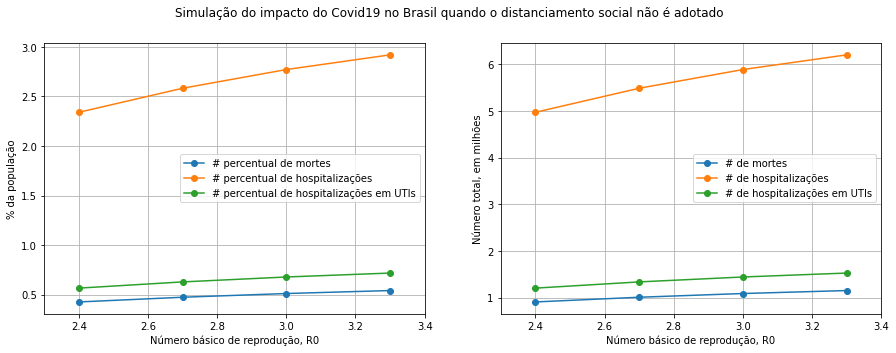

In [30]:
# plot
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# plot percentual
no_social_distance.plot(x="R0",
                        y=['total_deaths_perc',
                           'total_hospital_perc',
                           'total_critical_perc'],
                        style='o-',
                        ax=ax[0],
                        label=['# percentual de mortes',
                               '# percentual de hospitalizações',
                               '# percentual de hospitalizações em UTIs'])
ax[0].set_ylabel("% da população")
ax[0].set_xlabel("Número básico de reprodução, R0")
ax[0].set_xlim([2.3, 3.4])
ax[0].grid()

# plot valores absolutos (em milhões)
no_social_distance.plot(x='R0',
                        y=['total_deaths_million',
                           'total_hospital_million',
                           'total_critical_million'],
                        style='o-',
                        ax=ax[1],
                        label=['# de mortes',
                               '# de hospitalizações',
                               '# de hospitalizações em UTIs'])
ax[1].set_ylabel("Número total, em milhões")
ax[1].set_xlabel("Número básico de reprodução, R0")
ax[1].set_xlim([2.3, 3.4])
ax[1].grid()
plt.suptitle("Simulação do impacto do Covid19 no Brasil quando o \
distanciamento social não é adotado")
plt.show()

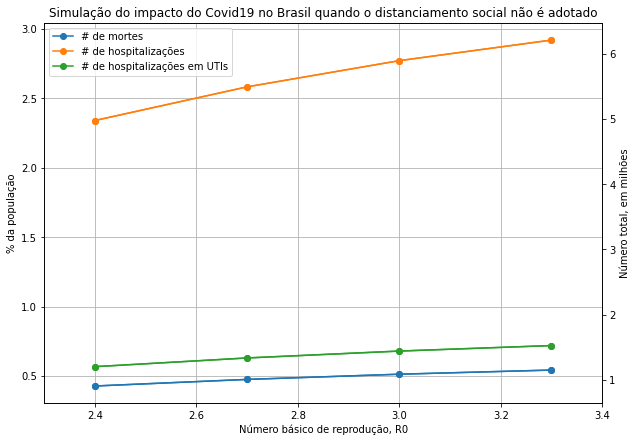

In [68]:
# plot
fig, ax0 = plt.subplots(ncols=1)

# plot percentual
no_social_distance.plot(x="R0",
                        y=['total_deaths_perc',
                           'total_hospital_perc',
                           'total_critical_perc'],
                        style='o-',
                        ax=ax0,
                        label=['# de mortes',
                               '# de hospitalizações',
                               '# de hospitalizações em UTIs'],
                        title="Simulação do impacto do Covid19 no Brasil quando o \
distanciamento social não é adotado")
ax0.set_ylabel("% da população")
ax0.set_xlabel("Número básico de reprodução, R0")
ax0.set_xlim([2.3, 3.4])
ax0.grid()

# twin y-axis
ax1 = ax0.twinx()

# plot valores absolutos (em milhões)
no_social_distance.plot(x='R0',
                        y=['total_deaths_million',
                           'total_hospital_million',
                           'total_critical_million'],
                        style='o-',
                        legend=False,
                        ax=ax1)
ax1.set_ylabel("Número total, em milhões");

In [0]:
# dataframe com todas as estratégias de mitigação no Brasil
social_distance = br_mitigation_df.drop(["Country"], axis=1)

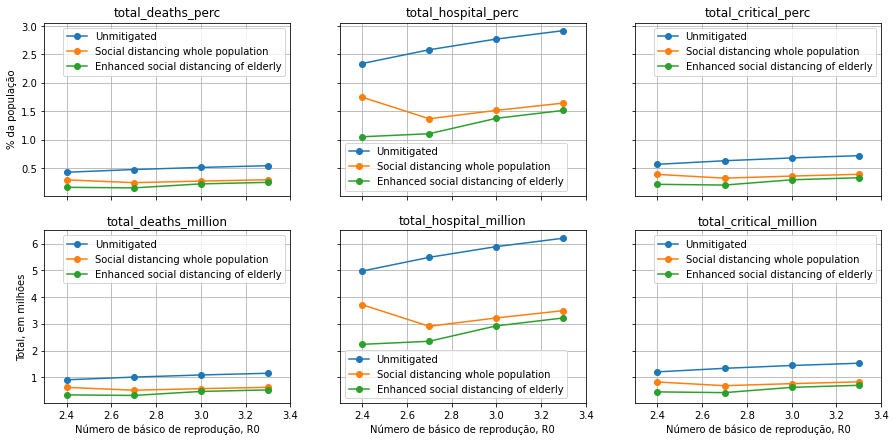

In [0]:
# features a serem plotadas em percentual e por milhão
y = ['total_deaths',
     'total_hospital',
     'total_critical']

# número de features
n = len(y)  

# instanciando o objeto para plot
# grid de plot com 2 linhas e 3 (len(y)) colunas compartilhando o eixo x e 
# compartilhando o eixo y nas linhas
fig, ax = plt.subplots(ncols=len(y),
                       nrows=2,
                       figsize=(15, 7),
                       sharex=True,
                       sharey='row')

# laço nas i features
for i in range(n):
    # colunas percentual e por milhão: concatenando as strings
    column = [y[i]+'_perc', y[i]+'_million']

    # dataframe com as colunas [y[i]+'_perc', y[i]+'_million', 'R0', 'Strategy']
    df = social_distance.loc[:, column+['R0', 'Strategy']]

    # laço em cada uma das estratégias
    for s in df['Strategy'].unique():
        # plot percentual (column[0]) da estratégia s na linha 0, coluna i
        df.loc[df['Strategy']==s, :].plot(x='R0',
                                          y=[column[0]],
                                          style='o-',
                                          ax=ax[0][i],
                                          label=[s])
        
        # plot absoluto (column[1]) da estratégia s na linha 1, coluna i
        df.loc[df['Strategy']==s, :].plot(x='R0',
                                          y=[column[1]],
                                          style='o-',
                                          ax=ax[1][i],
                                          label=[s])
    
    # configuração dos plots da linha 0, coluna i
    ax[0][i].grid()
    ax[0][i].set_title(column[0])
    ax[0][i].set_xlim([2.3, 3.4])
    ax[0][i].set_ylabel("% da população")
    ax[0][i].set_xlabel("Número básico de reprodução, R0")

    # configuração dos plots da linha 1, coluna i
    ax[1][i].grid()
    ax[1][i].set_title(column[1])
    ax[1][i].set_xlim([2.3, 3.4])
    ax[1][i].set_ylabel("Total, em milhões")
    ax[1][i].set_xlabel("Número de básico de reprodução, R0")

# Worksheet: Suppression
## Análise dos dados

In [0]:
# Aba Supression
supression_df = pd.read_excel(data, data.sheet_names[2])

# print nos nomes das colunas
print(supression_df.columns)

Index(['Country', 'R0', 'Strategy', 'Social_distance',
       'Deaths per week at trigger', 'total_pop', 'total_infected',
       'total_deaths', 'total_hospital', 'peak_hospital_bed_demand',
       'total_critical', 'peak_critical_bed_demand'],
      dtype='object')


In [0]:
# slice nos dados do Brasil
br_supression_df = supression_df.loc[supression_df['Country']=='Brazil',
                                     ['Country',
                                      'Strategy',
                                      'peak_hospital_bed_demand',
                                      'peak_critical_bed_demand']]

In [0]:
# por 100.000
c = ['peak_hospital_bed_demand','peak_critical_bed_demand']
br_supression_df[[c+'_per1ht' for c in c]] = br_supression_df.loc[:, c]*1e-5

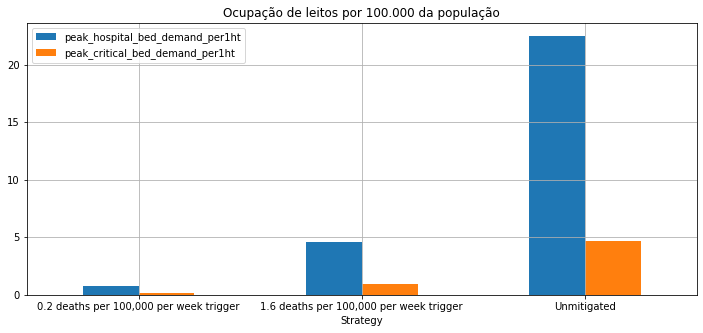

In [0]:
# ocupação de leitos hospitalares por 100.000
br_supression_df.sort_values(by='peak_hospital_bed_demand', inplace=True)
br_supression_df.plot.bar(x='Strategy',
                          y=['peak_hospital_bed_demand_per1ht',
                             'peak_critical_bed_demand_per1ht'],
                          figsize=(12, 5),
                          rot=0,
                          grid=True,
                          title='Ocupação de leitos por 100.000 da população');

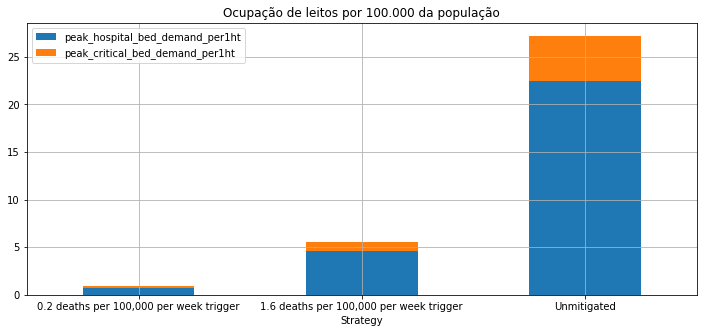

In [0]:
# ocupação de leitos hospitalares por 100.000
br_supression_df.plot.bar(x='Strategy',
                          y=['peak_hospital_bed_demand_per1ht',
                             'peak_critical_bed_demand_per1ht'],
                          figsize=(12, 5),
                          rot=0,
                          grid=True,
                          title='Ocupação de leitos por 100.000 da população',
                          stacked=True);

## Usando o Plotly...

O plotly é uma biblioteca de visualização poderosíssima e que nos permite realizar visualizações do tipo:

In [0]:
# plotly.express: interface alto nível para objetos do plotly
import plotly.express as px

In [0]:
# exemplo
df = px.data.gapminder()
fig = px.scatter_geo(df,
                     locations="iso_alpha",
                     color="continent",
                     hover_name="country",
                     size="pop",
                     projection="natural earth",
                     animation_frame='year')
fig.show()

In [0]:
# plotly.graph_objects: manipulação dos objetos de plot
import plotly.graph_objects as go

In [0]:
# criando os traces do plot

# primeiro traçado: peak_hospital_bed_demand_per1ht
trace_1 = go.Bar(name='peak_hospital_bed_demand_per1ht',
                 x=br_supression_df['Strategy'],
                 y=br_supression_df['peak_hospital_bed_demand_per1ht'],
                 hoverinfo='y')

# segundo traçado: peak_critical_bed_demand_per1ht
trace_2 = go.Bar(name='peak_critical_bed_demand_per1ht',
                 x=br_supression_df['Strategy'],
                 y=br_supression_df['peak_critical_bed_demand_per1ht'],
                 hoverinfo='y')

# objeto do plot: data é uma lista com todos os traçados do plot
fig = go.Figure(data=[trace_1, trace_2])

# visualizando a plot
fig.update_layout(barmode='group')
fig.show()

In [0]:
# mundando o estilo para stacked
fig.update_layout(barmode='stack',
                  yaxis={'title': 'Occupancy per 100,000 Population',
                         'titlefont_size': 16,
                         'tickfont_size': 14},
                  xaxis={'titlefont_size': 16,
                         'tickfont_size': 14})
fig.show()

In [0]:
# extract data frame
df = mitigation_df.loc[:, ['Country',
                           'Strategy',
                           'total_pop',
                           'total_deaths']]

In [0]:
# get perceuntial
df['total_deaths_perc'] = df['total_deaths']/df['total_pop']*100

In [0]:
# group by strategy
df = df.groupby(by=['Strategy', 'Country'], as_index=False).mean()

In [0]:
df.head()

,Strategy,Country,total_pop,total_deaths,total_deaths_perc
0,Enhanced social distancing of elderly,Afghanistan,38928341.0,53408.00,0.137196
1,Enhanced social distancing of elderly,Albania,2877800.0,6472.50,0.224911
2,Enhanced social distancing of elderly,Algeria,43851043.0,91396.25,0.208424
3,Enhanced social distancing of elderly,Angola,32866268.0,37454.00,0.113959
4,Enhanced social distancing of elderly,Antigua and Barbuda,97928.0,189.50,0.193510


In [0]:
# plot
fig = px.scatter_geo(df,
                     locations="Country",
                     color='Country',
                     locationmode='country names',
                     hover_name="Country",
                     size="total_deaths_perc",
                     animation_frame='Strategy',
                     projection="natural earth")

# configurando o layout do título
fig.update_layout(title={'text': "Impactos do Covid19 no mundo",
                         'y':0.95,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()